In [21]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [22]:
data = {
    'job_title_short': ['Data Analyst', 'Data Scientist', 'Data Engineer'],
    'job_skills': [['excel', 'sql', 'python'], ['python', 'r'], ['aws', 'python', 'airflow']]
}

df_skills = pd.DataFrame(data)

df_skills

,job_title_short,job_skills
0,Data Analyst,"[excel, sql, python]"
1,Data Scientist,"[python, r]"
2,Data Engineer,"[aws, python, airflow]"


In [23]:
df_skills.explode('job_skills')

,job_title_short,job_skills
0,Data Analyst,excel
0,Data Analyst,sql
0,Data Analyst,python
1,Data Scientist,python
1,Data Scientist,r
2,Data Engineer,aws
2,Data Engineer,python
2,Data Engineer,airflow


In [24]:
df['job_title_short'].head(5)

0    Senior Data Engineer
1            Data Analyst
2           Data Engineer
3           Data Engineer
4           Data Engineer
Name: job_title_short, dtype: object

In [25]:
help(df.explode)

Help on method explode in module pandas.core.frame:

explode(column: 'IndexLabel', ignore_index: 'bool' = False) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Transform each element of a list-like to a row, replicating index values.
    
    Parameters
    ----------
    column : IndexLabel
        Column(s) to explode.
        For multiple columns, specify a non-empty list with each element
        be str or tuple, and all specified columns their list-like data
        on same row of the frame must have matching length.
    
        .. versionadded:: 1.3.0
            Multi-column explode
    
    ignore_index : bool, default False
        If True, the resulting index will be labeled 0, 1, …, n - 1.
    
    Returns
    -------
    DataFrame
        Exploded lists to rows of the subset columns;
        index will be duplicated for these rows.
    
    Raises
    ------
    ValueError :
        * If columns of the frame are not unique.
        * If specified columns

In [26]:
df_exploded = df.explode('job_skills')

In [27]:
skills_count = df_exploded.groupby(['job_title_short','job_skills',]).size()
type(skills_count)

pandas.core.series.Series

In [28]:
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)
df_skills_count

,job_title_short,job_skills,skill_count
19078,Data Analyst,['excel'],8095
49382,Data Analyst,['sql'],4997
136380,Data Scientist,['python'],4659
35354,Data Analyst,"['sql', 'excel']",3020
1233,Business Analyst,['excel'],2443
...,...,...,...
32,Business Analyst,"['assembly', 'confluence', 'jira']",1
33,Business Analyst,"['assembly', 'drupal']",1
34,Business Analyst,"['assembly', 'excel', 'flow']",1
35,Business Analyst,"['assembly', 'excel', 'ms access', 'power bi']",1


In [32]:
job_title = 'Data Analyst'
head_value = 10

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(head_value)


In [33]:
df_skill_final

,job_title_short,job_skills,skill_count
19078,Data Analyst,['excel'],8095
49382,Data Analyst,['sql'],4997
35354,Data Analyst,"['sql', 'excel']",3020
31055,Data Analyst,['sap'],1718
43955,Data Analyst,"['sql', 'python']",1593
23167,Data Analyst,['power bi'],1577
48552,Data Analyst,"['sql', 'tableau']",1399
20636,Data Analyst,['go'],1354
49919,Data Analyst,['tableau'],1202
38284,Data Analyst,"['sql', 'power bi']",1003


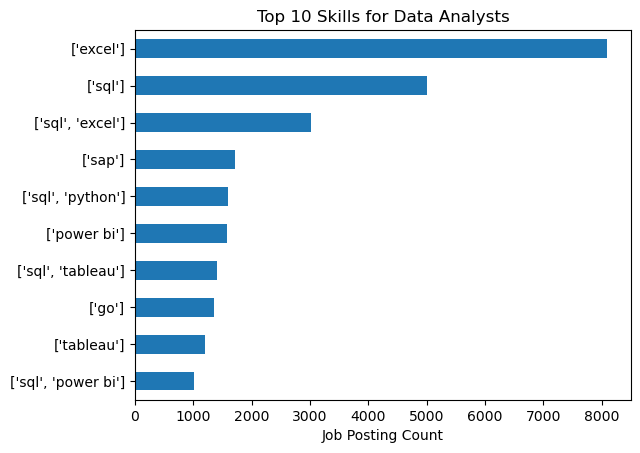

In [35]:
df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.title(f'Top {head_value} Skills for {job_title}s')
plt.gca().invert_yaxis()  # To display the highest value on top
plt.legend().set_visible(False)
plt.show()